In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print("Project setup successful ")


Project setup successful 


In [3]:
print("Explainable ICU Mortality Prediction - Project Started ")


Explainable ICU Mortality Prediction - Project Started 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
df = pd.read_csv("../data/heart_failure.csv")
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.shape


(299, 13)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df["DEATH_EVENT"].value_counts()


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [10]:
df["DEATH_EVENT"].value_counts(normalize=True)


DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

In [11]:
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

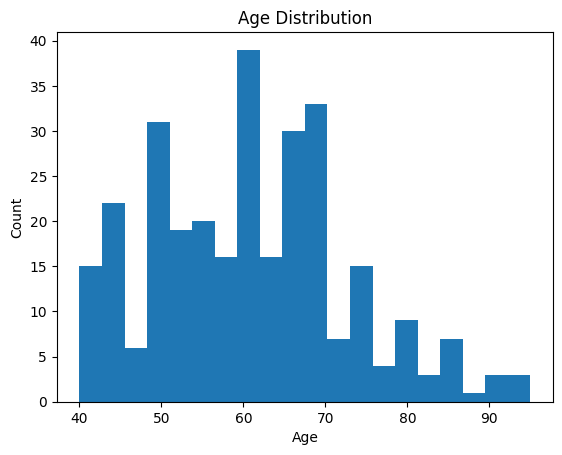

In [13]:
import matplotlib.pyplot as plt

plt.hist(df["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


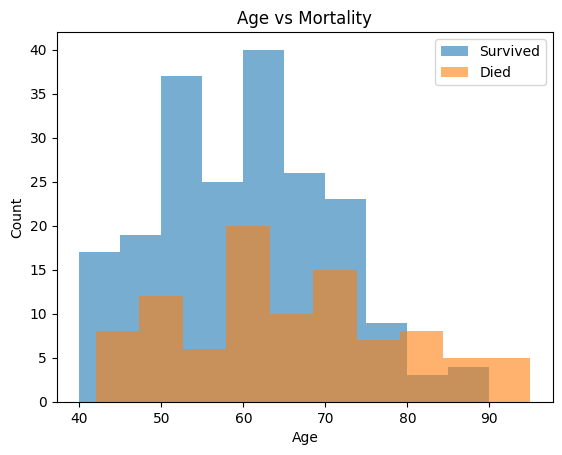

In [14]:
plt.hist(df[df["DEATH_EVENT"]==0]["age"], alpha=0.6, label="Survived")
plt.hist(df[df["DEATH_EVENT"]==1]["age"], alpha=0.6, label="Died")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age vs Mortality")
plt.show()


In [15]:
df["age_group"] = pd.cut(df["age"], bins=[40,50,60,70,80,90])

df.groupby("age_group")["DEATH_EVENT"].mean()


C:\Users\talha\AppData\Local\Temp\ipykernel_15140\1670690732.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["DEATH_EVENT"].mean()


age_group
(40, 50]    0.283582
(50, 60]    0.284091
(60, 70]    0.247059
(70, 80]    0.529412
(80, 90]    0.666667
Name: DEATH_EVENT, dtype: float64

In [16]:
df.groupby("DEATH_EVENT")["age"].mean()


DEATH_EVENT
0    58.761906
1    65.215281
Name: age, dtype: float64

In [17]:
df.groupby("DEATH_EVENT")["ejection_fraction"].mean()


DEATH_EVENT
0    40.26601
1    33.46875
Name: ejection_fraction, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df.drop(["DEATH_EVENT", "age_group"], axis=1)
y = df["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



C:\Users\talha\Desktop\icu-mortality-prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



In [20]:
model = LogisticRegression(max_iter=2000, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



In [21]:
import pandas as pd

feature_names = X.columns
coefficients = model.coef_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

coef_df.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
7,serum_creatinine,0.850733
0,age,0.696019
3,diabetes,0.216683
2,creatinine_phosphokinase,0.151193
10,smoking,0.038668
1,anaemia,-0.016750
5,high_blood_pressure,-0.119527
6,platelets,-0.149643
8,serum_sodium,-0.263215
9,sex,-0.314412


In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilities alıyoruz
y_prob = model.predict_proba(X_test)[:, 1]

# AUC hesapla
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)


ROC-AUC: 0.8354285714285715


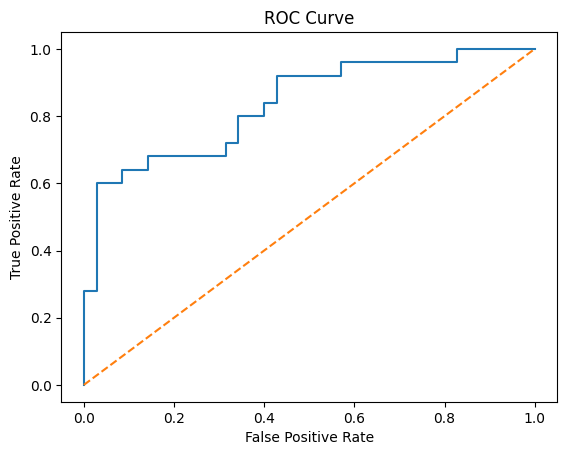

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Modeli tanımla
rf_model = RandomForestClassifier(
    n_estimators=500, 
    random_state=42, 
    class_weight="balanced"
)

# Eğit
rf_model.fit(X_train, y_train)

# Tahmin
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Performans
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

ROC-AUC: 0.8491428571428572


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Dataset yükle
df = pd.read_csv("../data/heart_failure.csv")

# Feature ve target
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Random Forest modeli
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


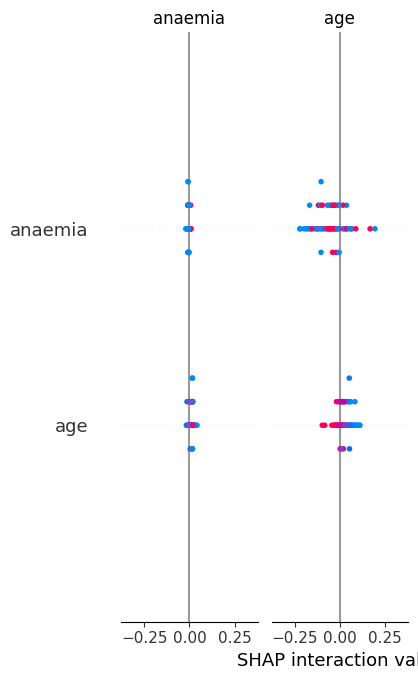

In [7]:
import shap
import numpy as np

# TreeExplainer
explainer = shap.TreeExplainer(rf_model)

# SHAP values
shap_values = explainer(X_test)

# DataFrame olarak ver
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# summary plot
shap.summary_plot(shap_values.values, X_test_df)


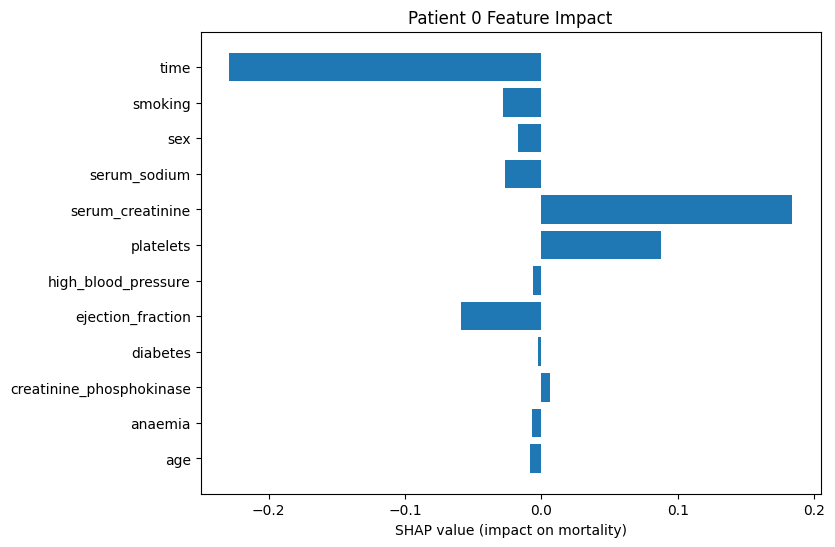

In [10]:
# Tek hasta için class 1 SHAP değerleri
shap_vals = shap_values.values[patient_index][:,1] if shap_values.values.ndim==3 else shap_values.values[patient_index, :]

# Bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(X.columns, shap_vals)
plt.xlabel("SHAP value (impact on mortality)")
plt.title(f"Patient {patient_index} Feature Impact")
plt.show()


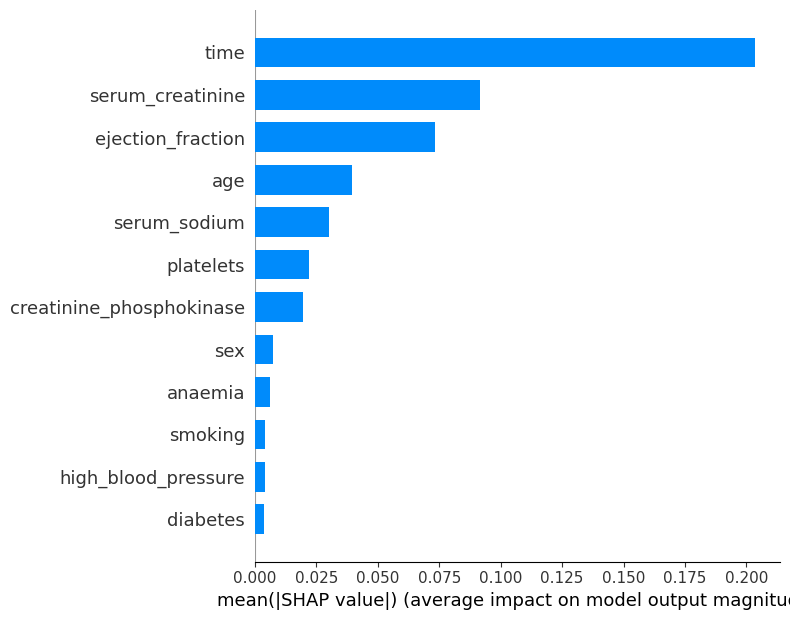

In [11]:
import shap
import pandas as pd

# DataFrame olarak test seti
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Summary plot
shap.summary_plot(shap_values.values[:,:,1] if shap_values.values.ndim==3 else shap_values.values, 
                  X_test_df, 
                  plot_type="bar")  # bar veya dot plot yapabilirsin


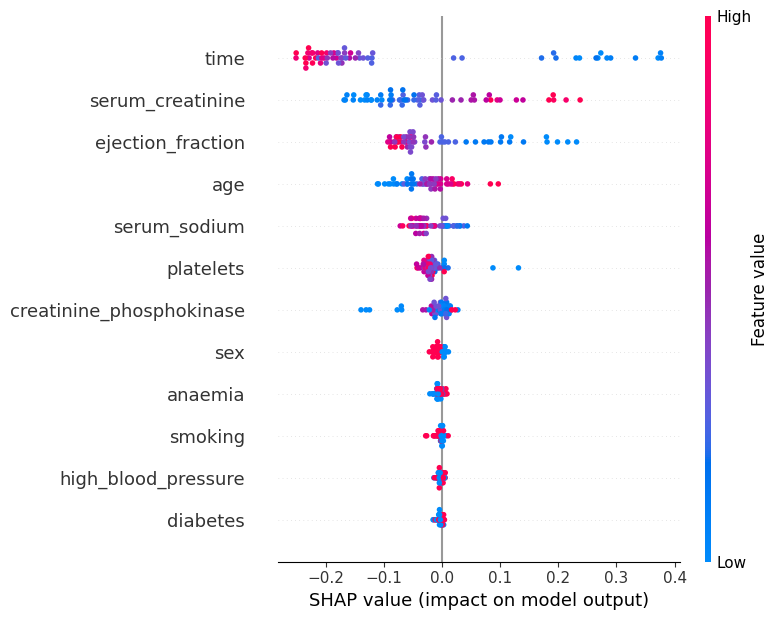

In [12]:
import shap
import pandas as pd

# Test seti DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Dot plot ile SHAP
shap.summary_plot(
    shap_values.values[:, :, 1] if shap_values.values.ndim==3 else shap_values.values,
    X_test_df,
    plot_type="dot"
)


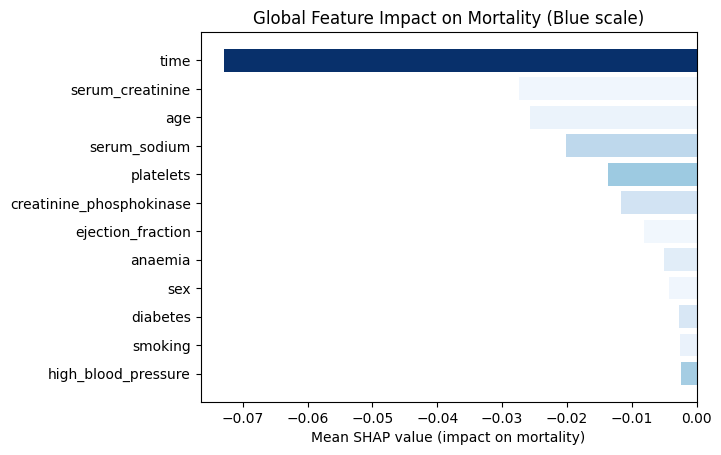

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SHAP values for class 1
shap_vals = shap_values.values[:, :, 1] if shap_values.values.ndim==3 else shap_values.values

# Mean SHAP per feature
mean_shap = np.mean(shap_vals, axis=0)

# Feature & mean SHAP DataFrame
shap_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP": mean_shap
})

# Normalize for color intensity (0-1)
abs_max = np.max(np.abs(shap_df["Mean_SHAP"]))
colors = [plt.cm.Blues(abs(val)/abs_max) for val in shap_df["Mean_SHAP"]]

# Sort by absolute impact
shap_df_sorted = shap_df.reindex(shap_df["Mean_SHAP"].abs().sort_values(ascending=True).index)

# Bar plot
plt.barh(shap_df_sorted["Feature"], shap_df_sorted["Mean_SHAP"], color=colors)
plt.xlabel("Mean SHAP value (impact on mortality)")
plt.title("Global Feature Impact on Mortality (Blue scale)")
plt.show()  



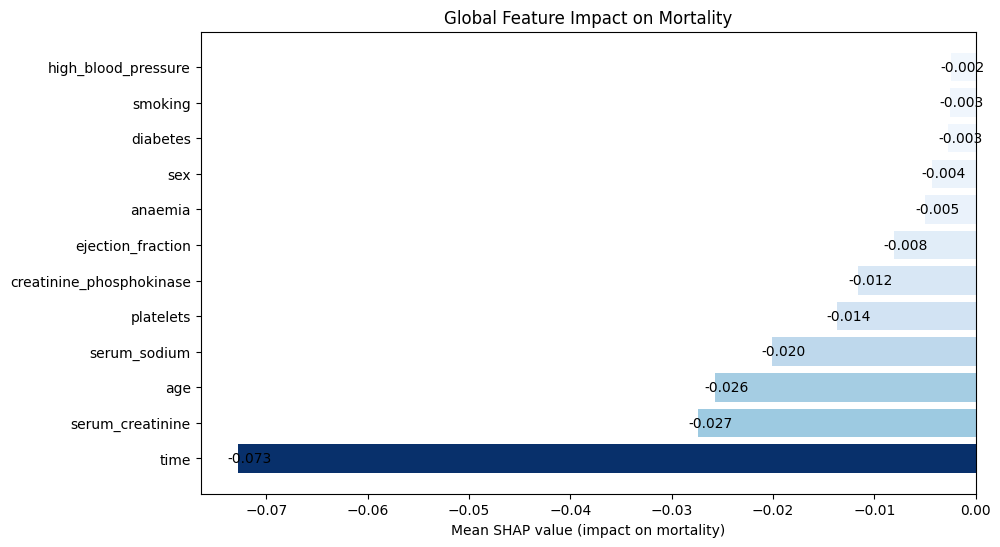

Feature Impact Table (Mean SHAP values):


,Feature,Mean_SHAP
0,time,-0.072847
1,serum_creatinine,-0.027354
2,age,-0.025755
3,serum_sodium,-0.020112
4,platelets,-0.013715
5,creatinine_phosphokinase,-0.011592
6,ejection_fraction,-0.008085
7,anaemia,-0.004991
8,sex,-0.004315
9,diabetes,-0.002676


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# SHAP values for class 1
shap_vals = shap_values.values[:, :, 1] if shap_values.values.ndim==3 else shap_values.values

# Mean SHAP per feature
mean_shap = np.mean(shap_vals, axis=0)

# Feature & mean SHAP DataFrame
shap_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP": mean_shap
}).sort_values(by="Mean_SHAP", ascending=True)

# Normalize for color intensity (0-1)
abs_max = np.max(np.abs(shap_df["Mean_SHAP"]))
colors = [plt.cm.Blues(abs(val)/abs_max) for val in shap_df["Mean_SHAP"]]

# Figure
fig, ax = plt.subplots(figsize=(10,6))

# Horizontal bar plot
bars = ax.barh(shap_df["Feature"], shap_df["Mean_SHAP"], color=colors)

# Labels and title
ax.set_xlabel("Mean SHAP value (impact on mortality)")
ax.set_title("Global Feature Impact on Mortality")

# Add numeric labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.001*np.sign(width), bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', va='center')

plt.show()

# Display the table
print("Feature Impact Table (Mean SHAP values):")
display(shap_df.reset_index(drop=True))



In [23]:
import os

# Eğer 'results' klasörü yoksa oluştur
os.makedirs("results", exist_ok=True)

# Şimdi kaydet
fig.savefig("results/global_feature_impact.png", bbox_inches='tight', dpi=300)
shap_df.reset_index(drop=True).to_csv("results/global_feature_impact_table.csv", index=False)

print(" Figure and table saved to 'results/' folder. Ready for GitHub and LinkedIn!")


 Figure and table saved to 'results/' folder. Ready for GitHub and LinkedIn!


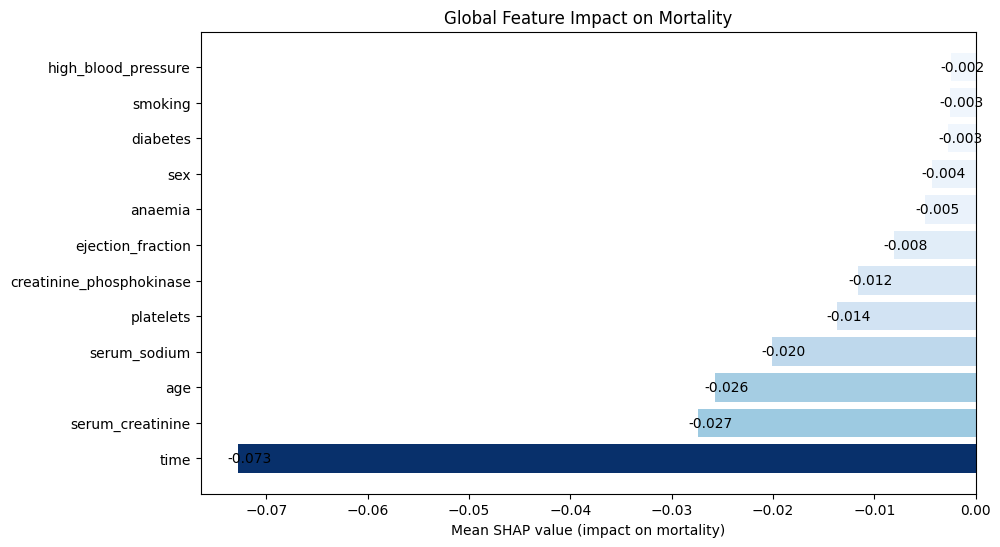

 Figure and table saved to 'results/' folder. Ready for GitHub and LinkedIn!


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# SHAP values for class 1
shap_vals = shap_values.values[:, :, 1] if shap_values.values.ndim==3 else shap_values.values

# Mean SHAP per feature
mean_shap = np.mean(shap_vals, axis=0)

# Feature & mean SHAP DataFrame
shap_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP": mean_shap
}).sort_values(by="Mean_SHAP", ascending=True)

# Normalize for color intensity (0-1)
abs_max = np.max(np.abs(shap_df["Mean_SHAP"]))
colors = [plt.cm.Blues(abs(val)/abs_max) for val in shap_df["Mean_SHAP"]]

# Figure
fig, ax = plt.subplots(figsize=(10,6))

# Horizontal bar plot
bars = ax.barh(shap_df["Feature"], shap_df["Mean_SHAP"], color=colors)

# Labels and title
ax.set_xlabel("Mean SHAP value (impact on mortality)")
ax.set_title("Global Feature Impact on Mortality")

# Add numeric labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.001*np.sign(width), bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', va='center')

# Save figure
fig.savefig("results/global_feature_impact.png", bbox_inches='tight', dpi=300)

plt.show()

# Save table as CSV
shap_df.reset_index(drop=True).to_csv("results/global_feature_impact_table.csv", index=False)

print(" Figure and table saved to 'results/' folder. Ready for GitHub and LinkedIn!")


In [25]:
import os
os.getcwd()


'C:\\Users\\talha\\Desktop\\icu-mortality-prediction\\notebooks'

Current working directory: C:\Users\talha\Desktop\icu-mortality-prediction
 Figure and table saved in 'results/' folder inside main project directory


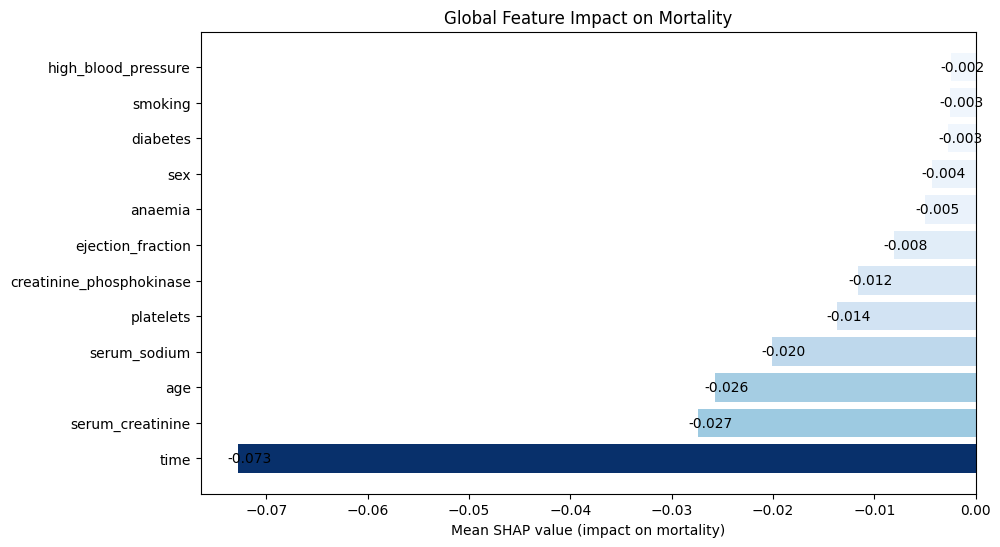

In [26]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#  Ana proje dizinine geç
project_dir = "C:/Users/talha/Desktop/icu-mortality-prediction"
os.chdir(project_dir)
print("Current working directory:", os.getcwd())

#  'results' klasörünü oluştur (varsa hata vermez)
os.makedirs("results", exist_ok=True)

#  SHAP values for class 1
shap_vals = shap_values.values[:, :, 1] if shap_values.values.ndim==3 else shap_values.values

#  Mean SHAP per feature
mean_shap = np.mean(shap_vals, axis=0)

#  Feature & mean SHAP DataFrame
shap_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_SHAP": mean_shap
}).sort_values(by="Mean_SHAP", ascending=True)

#  Normalize for color intensity (0-1)
abs_max = np.max(np.abs(shap_df["Mean_SHAP"]))
colors = [plt.cm.Blues(abs(val)/abs_max) for val in shap_df["Mean_SHAP"]]

#  Figure
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.barh(shap_df["Feature"], shap_df["Mean_SHAP"], color=colors)
ax.set_xlabel("Mean SHAP value (impact on mortality)")
ax.set_title("Global Feature Impact on Mortality")

#  Add numeric labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.001*np.sign(width), bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', va='center')

# Save figure and table
fig.savefig("results/global_feature_impact.png", bbox_inches='tight', dpi=300)
shap_df.reset_index(drop=True).to_csv("results/global_feature_impact_table.csv", index=False)

print(" Figure and table saved in 'results/' folder inside main project directory")
